# COMP0189: Applied Artificial Intelligence
## Coursework 1

**Overview**  
The goal of this coursework is to provide a realistic setting for machine learning application and develop critical thinking of each step of the application. It is part of the assignment to encode/pre-process the features, deal with potential missing data, identify potential models to solve the machine learning task, apply them appropriately and interpret the results.  

**Grading**  
Our focus will be on grading how well you performed each task as well as how well you described and justified each step. Please make sure all steps are well explained/justified in the markdown cells. 

**Submission**  
You should submit two files to the coursework submission - a jupyter notebook file and an HTML or PDF version of your notebook which can be exported. When exporting to HTML or PDF, make sure you do not clear the cell outputs. For better readability please keep your cell outputs concise and organized.

**Dataset description**  
The dataset for the course work can be found in Moodle and in the UCI Machine Learning repository (https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008). The dataset includes over 50 features representing patient and hospital outcomes. The aim is to predict which patients will need hospital readmission. Although there are three classes in the dataset (“<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission) we ask you to simplify the problem to classify patients with no record of readmission versus patients with record of readmission (combing the classes labelled as “<30” and “>30”). 

**Note** 
- This is an individual coursework, and we will investigate any submissions that seem to have been plagiarised.  
- While the modelling process is likely iterative, please follow the lay out of the tasks in the given order to facilitate marking.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


import warnings
warnings.filterwarnings("ignore")

# Task 1: Understanding the dataset (16%) 
Load the dataset and answer the following questions: 

### 1-1. What are the characteristics of the dataset (types of features, sample-to-features ratio, etc)? (2%) 

In [2]:
path = '/Users/alvis/Downloads/dataset_diabetes/diabetic_data.csv'
pathID = '/Users/alvis/Downloads/dataset_diabetes/IDs_mapping.csv'

ID_df = pd.read_csv(pathID)
dataset = pd.read_csv(path)
print(f'The shape of the dataset is: {dataset.shape}\n')
print(f'The type of the columns is:\n{dataset.dtypes.value_counts()}')

The shape of the dataset is: (101766, 50)

The type of the columns is:
object    37
int64     13
dtype: int64


**Describe your answer below in the markdown cell.**

<!-- <font color='grey'> -->
- The data contains 50 features and 101766 samples, which makes the sample-to-feature ratio 2035:1
- Out of 50, the dataset consists of:
> categorical features = 37
> continuous features = 13

<!-- </font> -->

### 1-2. What are the challenges with the dataset (missing data, unbalanced classes, etc)? (4%) 

In [3]:
# Your code goes below here
print(f'Unique Race values are:\n {dataset.race.unique()}\n')
# print(f'Unique Gender values are:\n {dataset.gender.unique()}\n')
# print(f'Unique Age values are:\n {dataset.age.unique()}\n')
print(f'Unique Weight values are:\n {dataset.weight.unique()}\n')
# print(f'Unique Readmission values are:\n {dataset.readmitted.unique()}\n')

for column in dataset.columns:
     if dataset[column].dtype == object:
            print(column,dataset[column][dataset[column] == '?'].count())
            dataset[column] = dataset[column].replace('?',np.nan).fillna(0)

Unique Race values are:
 ['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']

Unique Weight values are:
 ['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']

race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


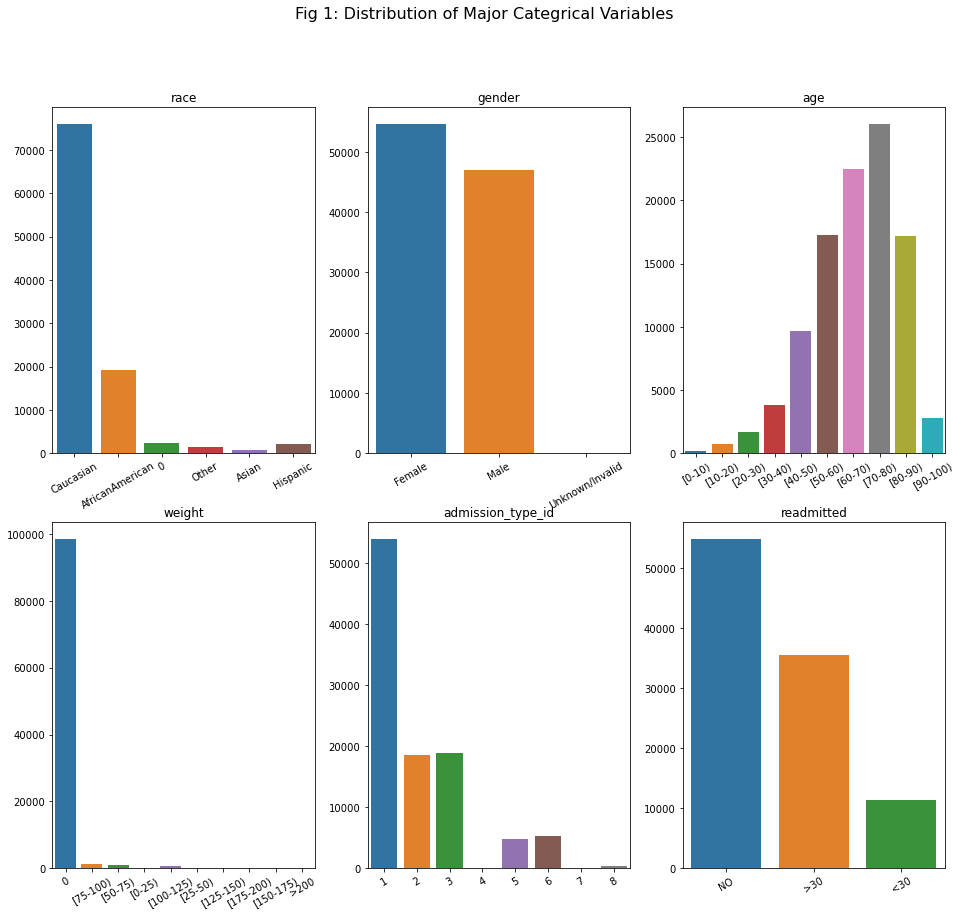

In [4]:

column_name = ['race','gender','age', 'weight','admission_type_id','readmitted']

plt.figure(figsize=[16,14])
for i in range(len(column_name)):
    plt.subplot(2,3,i+1)
    sns.countplot(x = dataset[column_name[i]], data = dataset)    
    plt.xticks(rotation=30)
    plt.xlabel('')
    plt.ylabel('')
    plt.title(column_name[i])
plt.suptitle('Fig 1: Distribution of Major Categrical Variables', size=16)  
plt.show()

**Describe your answer below in the markdown cell.**

- We observe that the dataset has '?' value for many features in the dataset. The feature weight has most of the values as '?'.

- To check for imbalanced classes, we select the major categorical variables that are sensitive and plot their distribution.

### 1-3. What type of data cleaning and pre-processing is needed (dropping features, encoding features, data imputation, etc)? (5%)

**Justify your answer below in markdown cell.**

- We obderve in the above plot that the feature 'weight' has eless than 5% datapoints in comaparison to other features. Additionally 'payer_code' and 'medical_speciality' have less than 50% datapoints. In such case, we won't be able to extract any meaning correlation between weight and readmittance. Thus, it is better if we drop these features from the dataset.
- Features like 'race','diag_1','diag_2','diag_3' have few missing values. These are categorical variables. So, the only imputation we can perform is that we replace the '?' value with 'NaN' values, so that the value '?' doesn't interefere with our analysis.
- We can encode some categorical variables for

### 1-4. Use descriptive statistics, figures/plots to explore the data (e.g. you could use violin plots to visualize the distribution of the different features). (5%) 

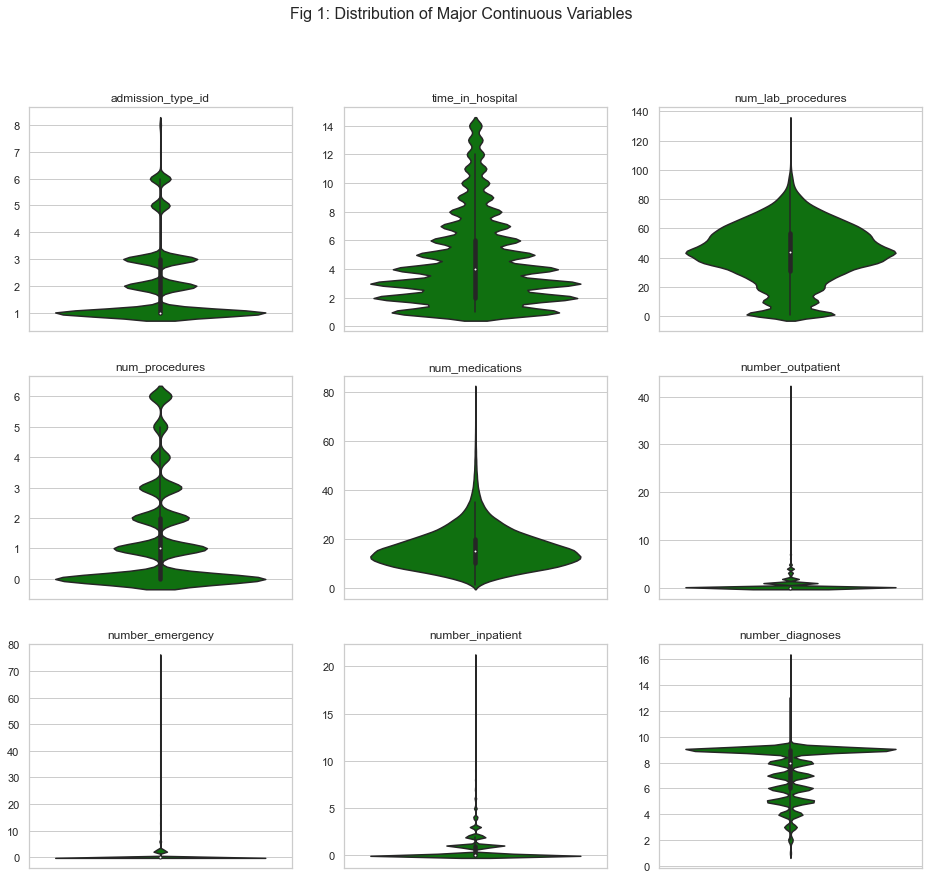

In [5]:
# Your code goes below here
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

race_count = dataset.groupby('race').size()
gender_count = dataset.groupby('gender').size()
age_count = dataset.groupby('age').size()
weight_count = dataset.groupby('weight').size()
admission_type_id_count = dataset.groupby('admission_type_id').size()
readmitted_count = dataset.groupby('readmitted').size()

column_name = ['admission_type_id','time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient',
                          'number_diagnoses']

plt.figure(figsize=[16,14])
for i in range(len(column_name)):
    plt.subplot(3,3,i+1)
    sns.violinplot(data=dataset, y=column_name[i], color="green")
    plt.xticks(rotation=30)
    plt.xlabel('')
    plt.ylabel('')
    plt.title(column_name[i])
plt.suptitle('Fig 1: Distribution of Major Continuous Variables', size=16)  
plt.show()

# Task 2: Data assembling and initial pre-processing (4%) 
Assemble a dataset consisting of features and labels (e.g. X and y). You can create a balanced dataset and/or use a subset of the data. Apply the pre-processing steps you consider necessary at this stage. Keep in mind that some pre-processing steps need to be embedded in the cross-validation framework to avoid data leaking. 

In [6]:
# Your code goes below here
##Note: remember that the pre-processing steps, including data centering and scaling should be embedded in the CV. (week-3 lab)

cols = ['race','gender','metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 
             'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 
             'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide','diabetesMed','change','max_glu_serum',
            'A1Cresult','max_glu_serum','diag_1','diag_2','diag_3']

for col in cols:
    dataset[col] = dataset[col].astype(str)

    
dataset = dataset.dropna()
input_data = dataset.drop(['weight','payer_code','medical_specialty','readmitted'],axis=1)

output_data = dataset.readmitted # Change categories from 3 to 2, and encode them
output_data = [0 if i=='NO' else 1 for i in output_data]

train_X, test_X, train_y,test_y = train_test_split(input_data,output_data, test_size=0.30)

## Non-categorical/continuous variables - Scaling, missing value imputation(we don't need any here because no missing values)
## categorical variables (diag_1, diag_2,diag_3) - One-hot encoding
## categorical variables (race, gender,) - label encoding

# We create transformer pipelines for each of the above three categories of variables and then apply throgh columntransformer fucntion of sklearn library

continuous_columns = ['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','number_diagnoses']
categorical_columns_onehot_enc = ['diag_1','diag_2','diag_3']
categorical_columns_ordinal_enc = ['race','gender','metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 
             'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 
             'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide','diabetesMed','change','max_glu_serum',
            'A1Cresult','max_glu_serum']

continuous_column_tx = Pipeline(steps=[("scaling", StandardScaler())])

categorical_column_onehot_tx = Pipeline(steps=[("SimpleImputer", SimpleImputer(strategy="most_frequent")),
                                                ("OneHotEncoding", OneHotEncoder(handle_unknown='ignore'))])

categorical_column_ordinal_tx = Pipeline(steps=[("ModeImputer", SimpleImputer(strategy="most_frequent")),
                                              ("OrdinalEncoding", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))])

column_tx = ColumnTransformer(transformers=[('continuous', continuous_column_tx, continuous_columns),
                                            ('catgorical_onehot',categorical_column_onehot_tx,categorical_columns_onehot_enc),
                                            ('catgorical_ordinal',categorical_column_ordinal_tx,categorical_columns_ordinal_enc)])


**Explain the procedure used to assemble the dataset and justify the pre-processing steps applied at this stage below in the markdown cell.**

- **Dropped Columns:** The dataset has been curated by dropping columns like ['weight','payer_code','medical_specialty'] because of irrelavance due to missing values.
- **Split Dataset:** The dataset has then been split into test and train, in order to prevent any kind of data leakage during preprocessing.
- **Encoding:** Columns have been identified that require suitable encoding techniques.
- **Pipeline:** Pipelines have been built using the dataset and techniques identified in the previous steps. The pipeline includes scaling of continuous variables and encoding of categorical variables.
- **ColumnTranformer:** A columntransformer has been built to implement the individual pipelines to respective columns. This transformer will be used in the next step for cross-validation.
- **Preprocessing:** The only preprocessing that has been done before splittign the data is replacing '?' sign with '0' value (in task 1-2) and dropping columns that have large number of missing values. Other types preprocessing is avoided here to prevent data leakage.

# Task 3: Design and build a machine learning pipeline (40%) 
Based on the machine learning task and dataset characteristics:

### 3-1. Use a Support Vector Machine (SVM) as a baseline model and choose four additional models to compare. (3%) 

**Justify your choices below in the markdown cell**

- Baseline Model - SVM
- Additional Models:
- > 1. **Logistic Regression:** The basis of prediction is calculating the probability of the target variable. One can set custom threshold to have binary outcome and thus classify data into one category or another and easily classify data. Thus Logistic Regression holds the simplicity of being a linear model as well accuracy of a probabilistic approach. Additionally, it is an interpretable model, that makes the process of classifictaion more transparent.
- > 2. **Random Forest:** Random Forest combines multiple decision trees to create a robust and accurate classifier. It has high accuracy, immune to outliers and ca handle large datasets.
- > 3. **K-Nearest Neighbors**  - It is based on findind the k-nearest neighbours, thus does not require long training times. It is non-parametric, thus less assumptions about the underlying distribution.
- > 4. **Decision Tree:** Decision Trees are more compact and remove unecessary features based on its parameters. It also does not require feature scaling or too much of preprocessing.


Reference:https://omdena.com/blog/machine-learning-classification-algorithms 

### 3-2. Choose a set of metrics to quantify the models’ performance. (2%) 

**Justify your choices below in the markdown cell.**

- The choice of metric depends on the type of problem we have in hand and the the aspects of predictions we want to focus on. With the task at hand, we want overall correct predictions, but we also want to make sure that False negatives (i.e people are predicted to be redmitted >30 days, but they were actually readmitted <30 days. This is important to monitor because have an imbalanced dataset and that might add a bias in our model that has more no. of predictions of the more prevalent classes and we do not want any risky assumptions about a person's health.

- For the same purpose, we have **F1 score** that speciafically helps track the number of False negatives in our overall predictions by tracking the number of true positives.

- F1 score is a combined score of Precision and Recall which are metrics for monitoring ratio of true positives w.r.t total positives in predictions and actual true positivs resptively.

### 3-3. Implement a cross-validation (CV) pipeline to optimize the models’ hyperparameters considering the data properties (e.g. need for stratified CV). Include additional pre-processing steps you consider necessary at this stage. The CV pipeline should provide multiple estimations of performance for a particular model to provide mean and standard deviation (e.g. repeated k-fold CV). Describe the cross-validation pipeline in a way that would enable someone to implement/reproduce it.  (25%) 

In [7]:
# Your code goes below here

## The use of stratified kfold is more justified when we re dealing with imbalanced classes as compared to K-fold where data is divided into k-folds where the disbalance may amplify through the cross validation process and may fetch a biased image of predictions.
## Stratified CV ensures that the classe proportion of classes in training and testing data are same as the original dataet, i.e. there is no additional inequlity added during the CV process.
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_recall_fscore_support, accuracy_score


train_X = train_X[1:10000]
train_y = train_y[1:10000]

models = [SVC, LogisticRegression,KNeighborsClassifier,DecisionTreeClassifier,RandomForestClassifier]

mean_std=[]
best_para=[]

for model in models:
    
    CV_pipeline = Pipeline(steps=[('preprocessing_pipeline',column_tx),
                                  (type(model()).__name__,model())])

    if model == SVC:
        param_grid = {'SVC__kernel': ('linear', 'rbf'),
                      'SVC__C': [0.001,0.1,1,10,100]}  
    elif model == LogisticRegression:
        param_grid = {'LogisticRegression__solver': ['newton-cg', 'lbfgs', 'liblinear'],
                      'LogisticRegression__C': [1e-1, 1, 10, 100]}
    elif model == KNeighborsClassifier:
        param_grid = {'KNeighborsClassifier__n_neighbors': [3, 5, 7, 9],
                      'KNeighborsClassifier__weights': ['uniform', 'distance']}
    elif model == DecisionTreeClassifier:
        param_grid = {'DecisionTreeClassifier__criterion': ['gini', 'entropy'],
                      'DecisionTreeClassifier__max_depth': [  5, 7, 9],}  
    elif model == RandomForestClassifier:
        param_grid = {'RandomForestClassifier__n_estimators': [10, 25, 50],
                     'RandomForestClassifier__max_depth': [None, 5, 10, 20]}
    
    
    for n in [3,5,7]:
        cv = StratifiedKFold(n_splits=n, shuffle=True)
    
        search = GridSearchCV(CV_pipeline, param_grid, scoring='f1', cv=cv, error_score='raise')
        search.fit(train_X, train_y) 
        best_para.append((type(model()).__name__,search.best_params_, search.best_score_))
        
        predictions = search.predict(test_X)
        test_score = precision_recall_fscore_support(predictions,test_y, average='weighted')
        acc_score = accuracy_score(predictions,test_y)
        
        cv_results = search.cv_results_
        mean_scores = cv_results['mean_test_score']
        std_scores = cv_results['std_test_score']
        

        for mean, std, params in zip(mean_scores, std_scores, cv_results['params']):
            mean_std.append((n, type(model()).__name__,str(params),round(mean,3),round(std,3),test_score[0],test_score[1],test_score[2],acc_score))

performance_df = pd.DataFrame(mean_std, columns=['Splits','Model','Parameters','Mean','StdD','precision','recall','f1','accuracy'])

**Describe the cross-validation pipenline and justify the pre-processing steps applied at this stage below in the markdown cell.**

- > **Import Preprocessing Pipleine:** The preprocessing pipeline built in previous task is imported here.
- > **CV Pipeline:** The cross-validation pipeline includes the preprocessing pipeline as the first step and passing all the ML models as the second step. Preprocessing that hav been done heer is **Scaling** of continuous variables, and **Encoding** of categorical variables. These steps have been embeddd in the CV_Pipeline as suggested by the Prof, to avoid data leakage.
- > **Parameter Grid:** A possible parameter list is defined for all five models. The hyperparameter tuning model picks the best combination for each of the models.
- > **StratifiedKfold CV:** It is used to perform cross-validation of the models, to prevent overfitting and improve accuracy. We try to run CV for 3 differnt k-fold values to provide multiple estimations.
- > **GridSearchCV:** It is our hyperparameter tuning algorithm that helps the model pick the best set of parameters from the parameter grid. It uses the CV_Pipeline to fit the models with differnt sets of parameters, until the best set of parameters is found.
- > Results for all five models along with other parameter values have accumulated in the form of a dataframe for analysis purpose.

### 3-4. Create plots to show how the models’ performance varies as function of the hyper-parameter values. (5%)  

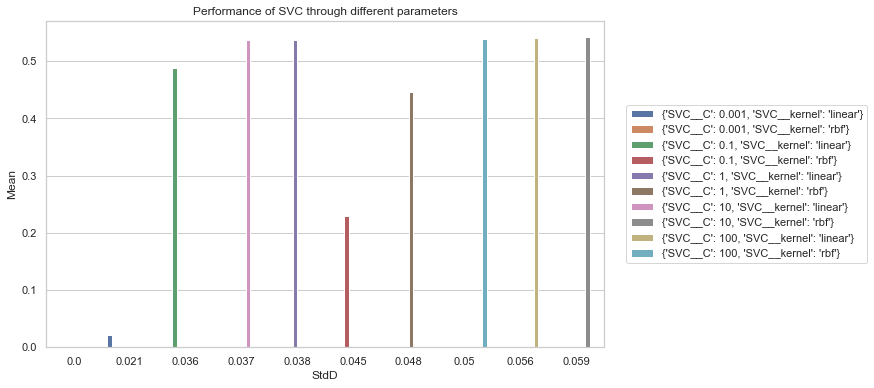

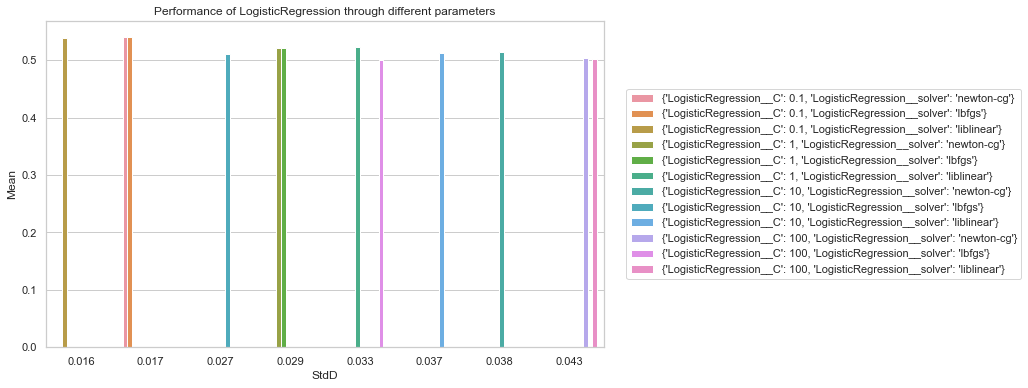

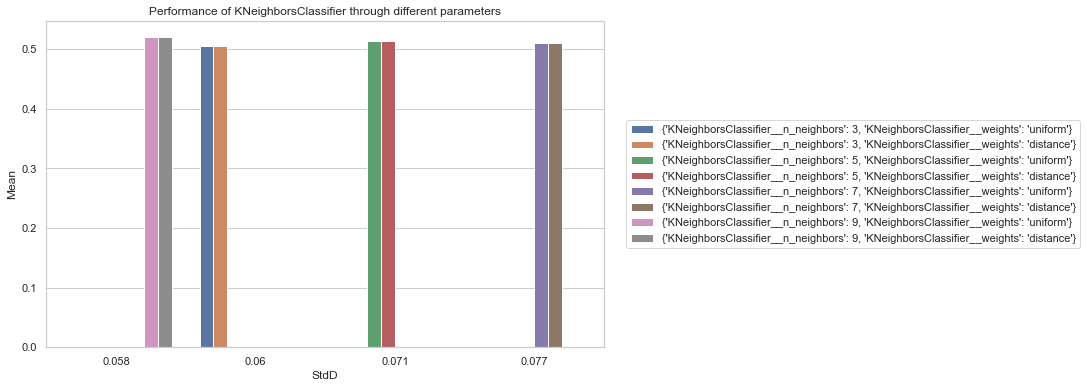

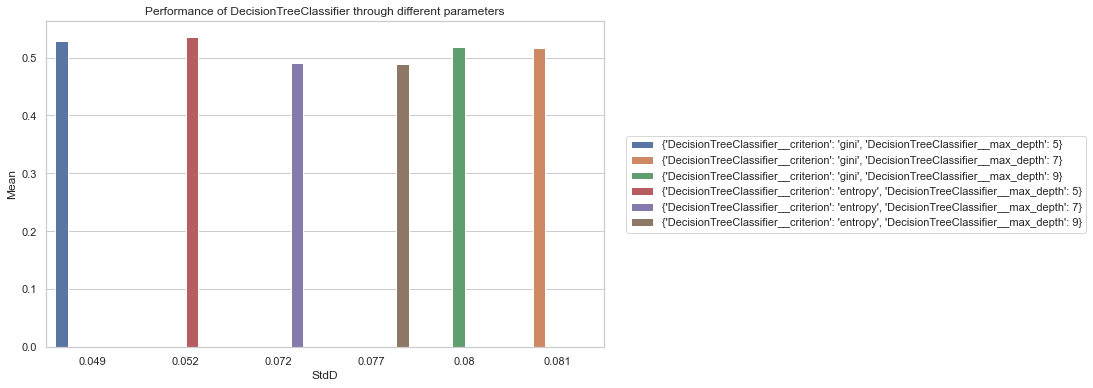

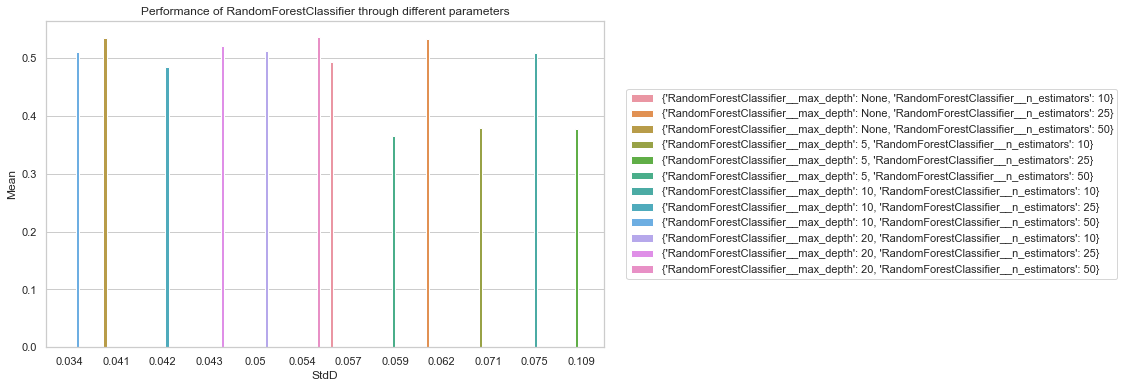

In [8]:
# Your code goes below here

models = performance_df.Model.unique()

for i in range(len(models)):
    df = performance_df[(performance_df.Model==models[i]) & (performance_df.Splits==7)]
    plt.figure(figsize=[10,6])
    colors = sns.color_palette('husl', n_colors=len(df))
    sns.barplot(y='Mean', x='StdD', data=df, hue='Parameters')
    plt.legend(bbox_to_anchor=(1.04, 0.5), loc='center left', borderaxespad=0)
    plt.xticks(rotation=0)
    plt.title(f'Performance of {models[i]} through different parameters')
plt.show()


### 3-5. Create a table or plot to show the performance of the different models (e.g. table with mean and std for the different metrics or a violin plots for the different metrics). (5%) 

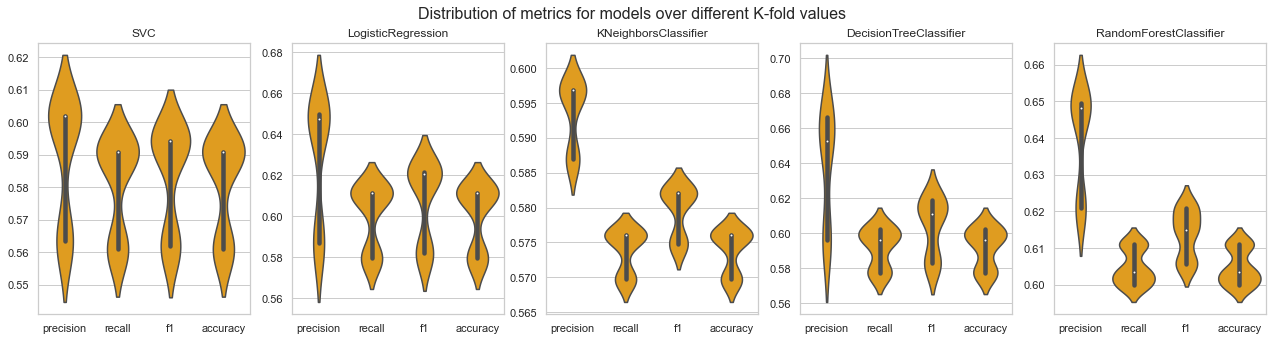

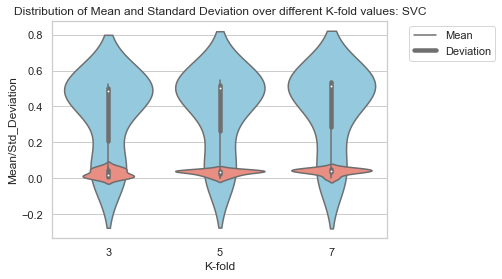

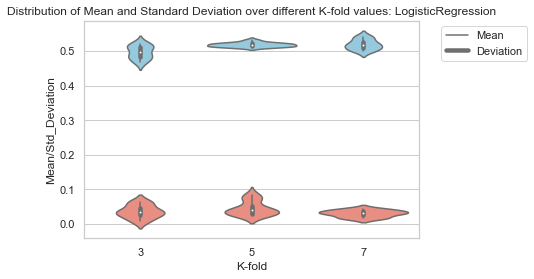

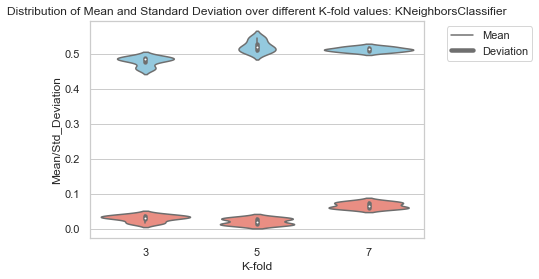

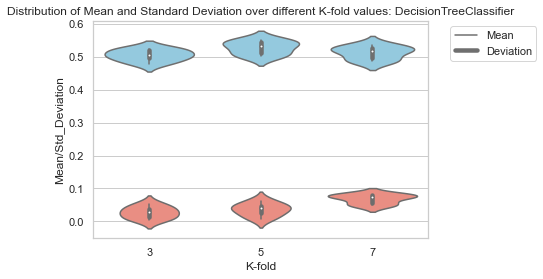

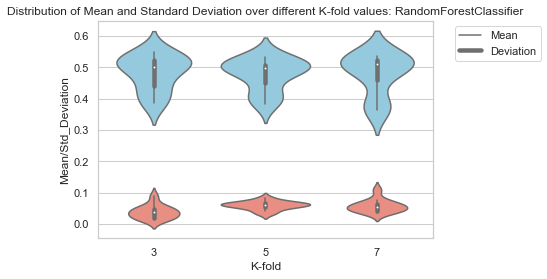

<Figure size 432x288 with 0 Axes>

In [9]:
# Your code goes below here

fig = plt.figure(figsize=[22,5])

models = performance_df.Model.unique()

for i in range(len(models)):
    plt.subplot(1,5,i+1)
    df = performance_df[(performance_df.Model==models[i])]
    df = df[['precision','recall','f1','accuracy']]
    sns.violinplot(data=df ,color="orange")
    plt.title(f'{models[i]}')
plt.suptitle('Distribution of metrics for models over different K-fold values', size=16)  
plt.show()


print('\n')


for i in range(len(models)):
    df = performance_df[(performance_df.Model==models[i])]
    sns.violinplot(x="Splits", y="Mean", data=df, color="skyblue")
    sns.violinplot(x="Splits", y="StdD", data=df, color="salmon")
    plt.title(f'Distribution of Mean and Standard Deviation over different K-fold values: {models[i]}')
    plt.xlabel('K-fold')
    plt.ylabel('Mean/Std_Deviation')
    plt.legend(labels=["Mean", "Deviation"],bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.show()
plt.suptitle('Distribution of Mean and Standard Deviation of models over different K-fold values', size=16)  
plt.show()

**Briefly describe the results below in the markdown cell.**

- > The Distibution of Mean varies widely for all 5 models.
- > For **SVM** model, the average performance of the model ranges from -0.2 to 0.8 for all 3 k-fold values, which means SVM is highy sensitive to the parameter values, althoigh the variability of performance is high at k-fold=7
- > For **Logistic Regression**, the average performance and deviation do not vary too much, but for k-fold=7, the performance is comparetively better with high variability for k-fold=5
- > For **KNN**, k-fold=7 performs slighlty better, with kfold=5 with very low variability.
- > For **Decision Tree**, k-fold=7 performs better with low variabiloity at kfold=5
- > For **Random Forest**, performance variability if high for all three kfold values.

For most of the models, kfold=7 brings maximum high performance.


# Task 4: Alternative pipeline (15%) 
To investigate potential benefits of feature selection:

### 4-1. Implement a pipeline that includes feature selection (or add feature selection to the previous pipeline if adequate). (5%) 

In [10]:
# Your code goes below here
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_selection import SelectKBest

models = [SVC, LogisticRegression,KNeighborsClassifier,DecisionTreeClassifier,RandomForestClassifier]

for model in models:
    FS_pipeline = Pipeline(steps=[('preprocessing_pipeline',column_tx),
                                  ('pca', TruncatedSVD()),
                                  (type(model()).__name__,model())])


### 4-2. Use the pipeline to test if adding a features selection approach leads to an improvement in performance with respect to the performance obtained in the previous tasks. Try at least two different feature selection approaches. (5%) 

In [11]:
# Your code goes below here

fs_score=[]

models = [SVC, LogisticRegression,KNeighborsClassifier,DecisionTreeClassifier,RandomForestClassifier]

for model in models:
    
    ## Approach 1
    FS_pipeline_tsvd = Pipeline(steps=[('preprocessing_pipeline',column_tx),
                                      ('tsvd', TruncatedSVD(n_components=10)),
                                      (type(model()).__name__,model())])
    FS_pipeline_tsvd.fit(train_X, train_y)
    y_pred = FS_pipeline_tsvd.predict(test_X)
    f1 = precision_recall_fscore_support(test_y, y_pred, average='weighted')
    fs_score.append((type(model()).__name__,'tsvd', f1[0],f1[1],f1[2]))
    
    
    ## Approach 2
    FS_pipeline_skb = Pipeline(steps=[('preprocessing_pipeline',column_tx),
                                      ('skb', SelectKBest(k=10)),
                                      (type(model()).__name__,model())])
    FS_pipeline_skb.fit(train_X, train_y)
    y_pred = FS_pipeline_skb.predict(test_X)
    f1 = precision_recall_fscore_support(test_y, y_pred, average='weighted')
    fs_score.append((type(model()).__name__,'skb', f1[0],f1[1],f1[2]))
    

### 4-3. Create tables or plots to show the performance of the different models (as in the previous task the table or plot should provide information about the performance distribution). (5%) 

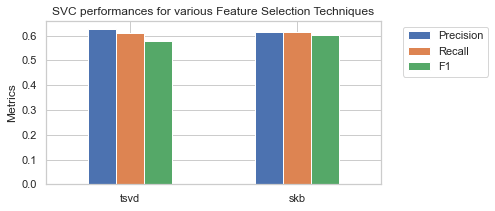

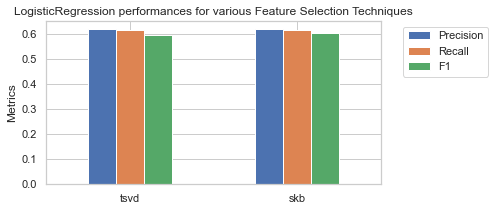

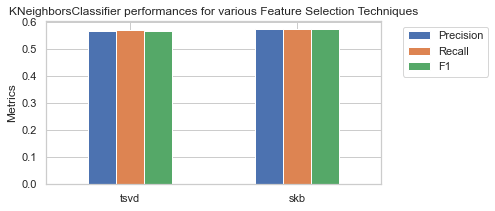

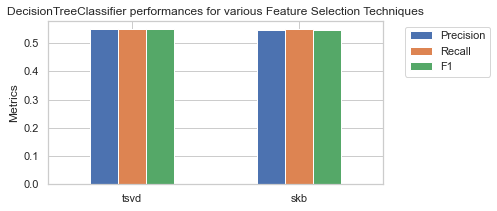

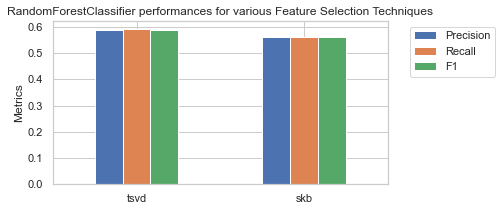

In [12]:
# Your code goes below here

fs_df = pd.DataFrame(fs_score, columns=['Model','Feature_selection','Precision','Recall','F1'])

models = fs_df.Model.unique()

for i in range(len(models)):
    df = fs_df[fs_df.Model==models[i]]
    df.plot(x="Feature_selection", y=["Precision", "Recall", "F1"], kind="bar", rot=0, figsize=[6,3])
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.title(f'{models[i]} performances for various Feature Selection Techniques')
    plt.xlabel('')
    plt.ylabel('Metrics')
    plt.show()


**Briefly describe the results below in the markdown cell.**

- Analysing the results from the alternative pipeline, we observe that 
- > The F1 Score is improved after feature selection for  both **SVC and Logistic Regression** (compared with plots in previous task)
- > The F1 Score for **KNN** remain approximately the same.
- > The F1 Score for **DecisionTree** is improved in skb approach of feature selection, but declined for the tsvd approach.
- > The F1 Score for **RandomForest** is approximately the same.

- > All three metrics, Precision, Recall, F1 remain approximately at the same level. But for different models, different feature_selection strategy works differently, e.g: For Tree-based models(Decision Tree, Random Forest) the **SelectKBest** method has worked better, but for other three models **TruncatedSVD** appears to work better. Thus, we conclude that same feature selection strategy should not be applied to different models, as it may impact the performance adversely.


# Task 5: Model Interpretation (15%) 
"Interpret" the models with the two highest performance (top 2): 

### 5-1. Create figures/plots to show the relative importance of different features for the model. You can plot the models’ coefficients (for linear models) or the feature importance (for tree-based models). Alternatively, use other potential strategies to identify relevant features to the model. (5%) 

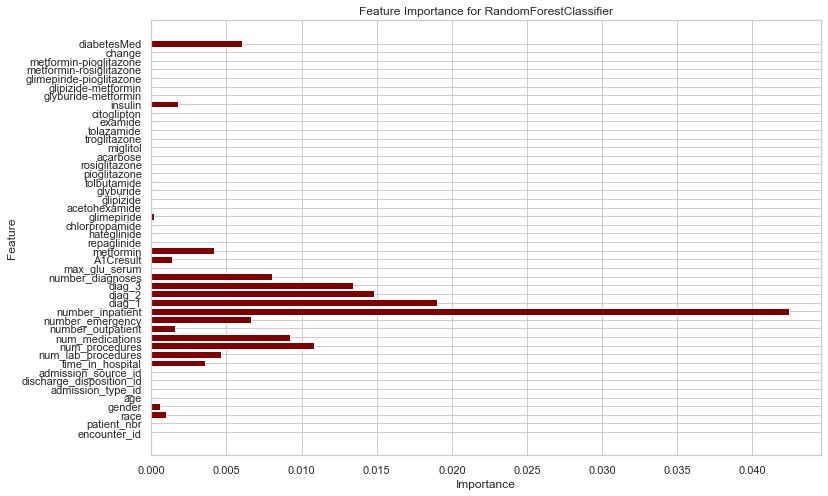

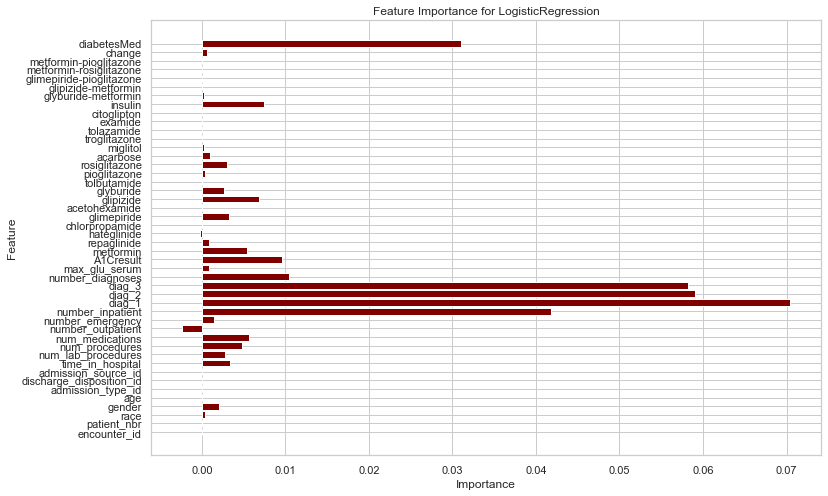

In [13]:
# Your code goes below here

from sklearn.inspection import permutation_importance

modelnames = models = ['RandF','LogR']
model_list = [RandomForestClassifier,LogisticRegression]


for model in model_list:
    
    plt.figure(figsize=[12,8])
    intp_pipeline = Pipeline(steps=[('preprocessing_pipeline',column_tx),(type(model()).__name__,model())])
    intp_pipeline.fit(train_X, train_y)
    perm_imp = permutation_importance(intp_pipeline, train_X,train_y)
    
    plt.barh(range(train_X.shape[1]), perm_imp.importances_mean, color ='maroon')
    plt.yticks(range(train_X.shape[1]), train_X.columns)
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.title(f'Feature Importance for {type(model()).__name__}')
    plt.show()


### 5-2. Based on the information from the coefficients/feature importance/other describe the models that presented the top 2 best performance for the machine learning task below. Discuss if the identified features make sense (or not) with respect to the task (5%) 

**Please write your discussion below in the markdown cell**

- **RandomForestClassifier** and **LogisticRegressor** have been the models with highest F1 score through our exerimentation.

- Logistic Regression is a linear model which is usually very interpretable, whereas Random Forest is considered as a black box model, where it is difficult to get information of what is happening in the box. 

- For general interpretability, a popular framework called **permutation_importance** of sklearn library has been used. It is a model that supports linear as well as non-linear models. The technique uses various permutations of features to get a score of importance of that feature, wrt it's relation with the target variable.

- The interpretations produced by the technique look promising and these features logically relate to the possibilties of readmission.  


### 5-3. Describe the similarities and differences of the features identified for the best performing models/pipelines. (5%) 

**Please add your description below in the markdown cell.**


#### Similarities:
- > Random Forest: It has features like (diag_1, diag_2, diag_3, no. of diagnosis, no. of inpatient and gender) in the same sequence as the most important features.
- > Logistic Regression: It has features like (diag_1, diag_2, diag_3, gender, no. of diagnosis, no. of inpatient) in the same sequence as the most importamt features.

- Both the models have **exactly same featues** as the top most important features

- The identified features definitely make sense these features directly correlate to the chances of a person coming back for readmission. 

#### Differences:
- For features like (no. of lab procedures, time in hospital), Logistic regression found negative correlations with readmission, i.e. these features are negatively impacting the classification process. Random Forest model chose to ignore these features and gave almost zero imortance to them.  

- But interestingly, Logistic Regression gives higher priority to 'gender' than Random Forest.

# Task 6: Identify limitation and propose potential solutions (10%) 
In this section you should consider potential limitations with both the dataset and the models/pipelines addressing the following questions:  

### 6-1. Do you identify potential limitations with the dataset that could limit the models’ performance in a real application? (2.5%) 

**Please describe them below in the markdown cell.**

#### Limitations of Dataset: 
- > The dataset has a **limited number** of features including demographics, diagnostic factors, and medical conditions. But, it may not capture all the factors that contribute to diabetes or its complications, such as lifestyle factors, genetic issues, or environmental factors.
- > The data has **quality issues** such as missing data, mixed datatype columns, imbalanced classes etc, that can adversly impact the model performance
- > The data is **old** (1999-2008) and does not keep up with technlogical advancements over years. Thus, it does not present the true picture.
- > The dataset does not tell the **timeframe** for which medicines were given to the patient, as it could help evaluate the treatment accuractely and help plan the future course of treatment.

### 6-2. What could be improved in the dataset to improve the models’ performance? (2.5%) 

**Please describe them below in the markdown cell.**

#### Potential Solutions: 
- > The dataset will improve if more **detailed features** including their their lifestyle, social status, environmental conditions and timeframe of imparting treatment would help get a better understanding of the patient.
- > If a **consistent and balanced dataset** is maintained, it would improve the accuracy and reliability of any analyses performed on the dataset.
- > If the before and after details of **treatment outcomes** is included, it would provide valuable insights into the effectiveness of different treatments and help guide the development of new treatment strategies.
- > If the dataset is of a **longer timeframe**, including datapoints from recent times, that would help identify long-term as well as recent trends in the incidence of diabetes

### 6-3. Can you identify limitations with the applied machine learning models or pipelines? (2.5%) 

**Please describe them below in the markdown cell.**

#### Limitations of Models/Pipeline: 
- > **Computationally Expensive:** We have included methods like hyperparameter tuning, multiple fold cross-validation and feature-selection at different steps of model development, all these steps are computationally and take a long time to process even a small amount of data. This can be a limitation in large-scale or real-time applications, where speed and efficiency are important.
- > **Data quality issues:** The dataset quality is not the best, and this adversely impacts the performance of the models.
- > **Lack of generalizability:** Although we have included cross-validationa to prevent ovetfitting, Generalization could still be an issue with the model because dataset is imbalanced and some of the models are non-linear and complex.
- > **Sparsity:** The dataset has aroung 50 features and most of them require encoding, which creates large sparse matrix. Many technique like PCA do not deal well with sparse data, thus limiting the scope of improvement. 

### 6-4. Can you propose potential solutions for the models’ limitations (e.g. alternative models or pipelines for the considered machine learning task or new methodological developments)? (2.5%) 

**Please describe them below in the markdown cell.**

#### Potential Solutions:
- > **Feature selection:** If feature selection is performed in the initial steps, it would remove irrrelevant features and would avoid unecessary sparsity in the dataset. This can also reduce the risk of overfitting and improve the generalization of the model.
- > **Hyperparameter tuning:** If we use more advanced techniques for hyperparameter tuning like Bayesian optimisation, the models can be estimated better an produce more accurate results.
- > **Alternate Models:** Deep Learning methods can be used as alternative models because DL models tend to capture deep set patterns which sometimes are missed by conventional models. We could also used Bayesian models that work on the principle of probability and helps quanitify uncertainity.It utilises prior information of the patient to estimate the outcome well.
- > **Ensemble methods:** We can combine the outcome of multiple weak models to produce more diverse yet accurate results. This can improve the robustness and generalization of the model. 

### References: Applied AI labwork